In [1]:
import pandas as pd
from sqlalchemy import create_engine
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt
import requests

In [2]:
file = "states_all.csv"
file2= "diversityindex.csv"
states_df = pd.read_csv(file)
diversity_df = pd.read_csv(file2)
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [3]:
states_df['id']=states_df.index
states_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,id
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,1
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,2
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,4


In [4]:
states_scores_df=states_df[['id', 'STATE', 'YEAR', 'TOTAL_REVENUE', 'GRADES_PK_G','GRADES_KG_G', 'GRADES_4_G', 'AVG_MATH_4_SCORE',
                            'AVG_READING_4_SCORE',]].copy()
states_scores_df.head()

,id,STATE,YEAR,TOTAL_REVENUE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,AVG_MATH_4_SCORE,AVG_READING_4_SCORE
0,0,ALABAMA,1992,2678885.0,8224.0,55460.0,57948.0,208.0,207.0
1,1,ALASKA,1992,1049591.0,2371.0,10152.0,9748.0,NaN,NaN
2,2,ARIZONA,1992,3258079.0,2544.0,53497.0,55433.0,215.0,209.0
3,3,ARKANSAS,1992,1711959.0,808.0,33511.0,34632.0,210.0,211.0
4,4,CALIFORNIA,1992,26260025.0,59067.0,431763.0,418418.0,208.0,202.0


In [5]:
states_scores_clean=states_scores_df.dropna()
states_scores_clean.head()

,id,STATE,YEAR,TOTAL_REVENUE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,AVG_MATH_4_SCORE,AVG_READING_4_SCORE
0,0,ALABAMA,1992,2678885.0,8224.0,55460.0,57948.0,208.0,207.0
2,2,ARIZONA,1992,3258079.0,2544.0,53497.0,55433.0,215.0,209.0
3,3,ARKANSAS,1992,1711959.0,808.0,33511.0,34632.0,210.0,211.0
4,4,CALIFORNIA,1992,26260025.0,59067.0,431763.0,418418.0,208.0,202.0
5,5,COLORADO,1992,3185173.0,7410.0,47588.0,50648.0,221.0,217.0


In [6]:

states_scores_clean.columns= states_scores_df.columns.str.lower()
states_scores_clean.head()



,id,state,year,total_revenue,grades_pk_g,grades_kg_g,grades_4_g,avg_math_4_score,avg_reading_4_score
0,0,ALABAMA,1992,2678885.0,8224.0,55460.0,57948.0,208.0,207.0
2,2,ARIZONA,1992,3258079.0,2544.0,53497.0,55433.0,215.0,209.0
3,3,ARKANSAS,1992,1711959.0,808.0,33511.0,34632.0,210.0,211.0
4,4,CALIFORNIA,1992,26260025.0,59067.0,431763.0,418418.0,208.0,202.0
5,5,COLORADO,1992,3185173.0,7410.0,47588.0,50648.0,221.0,217.0


In [7]:
rds_connection_string = "postgres:Caridad9598@localhost:5432/Proj-13"
engine = create_engine(f'postgresql://{rds_connection_string}')

In [8]:
engine.table_names()

['states_all', 'diversity']

In [9]:
states_scores_clean.to_sql(name='states_all', con=engine, if_exists='append', index=False)






IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "states_all_pkey"
DETAIL:  Key (id)=(0) already exists.

[SQL: INSERT INTO states_all (id, state, year, total_revenue, grades_pk_g, grades_kg_g, grades_4_g, avg_math_4_score, avg_reading_4_score) VALUES (%(id)s, %(state)s, %(year)s, %(total_revenue)s, %(grades_pk_g)s, %(grades_kg_g)s, %(grades_4_g)s, %(avg_math_4_score)s, %(avg_reading_4_score)s)]
[parameters: ({'id': 0, 'state': 'ALABAMA', 'year': 1992, 'total_revenue': 2678885.0, 'grades_pk_g': 8224.0, 'grades_kg_g': 55460.0, 'grades_4_g': 57948.0, 'avg_math_4_score': 208.0, 'avg_reading_4_score': 207.0}, {'id': 2, 'state': 'ARIZONA', 'year': 1992, 'total_revenue': 3258079.0, 'grades_pk_g': 2544.0, 'grades_kg_g': 53497.0, 'grades_4_g': 55433.0, 'avg_math_4_score': 215.0, 'avg_reading_4_score': 209.0}, {'id': 3, 'state': 'ARKANSAS', 'year': 1992, 'total_revenue': 1711959.0, 'grades_pk_g': 808.0, 'grades_kg_g': 33511.0, 'grades_4_g': 34632.0, 'avg_math_4_score': 210.0, 'avg_reading_4_score': 211.0}, {'id': 4, 'state': 'CALIFORNIA', 'year': 1992, 'total_revenue': 26260025.0, 'grades_pk_g': 59067.0, 'grades_kg_g': 431763.0, 'grades_4_g': 418418.0, 'avg_math_4_score': 208.0, 'avg_reading_4_score': 202.0}, {'id': 5, 'state': 'COLORADO', 'year': 1992, 'total_revenue': 3185173.0, 'grades_pk_g': 7410.0, 'grades_kg_g': 47588.0, 'grades_4_g': 50648.0, 'avg_math_4_score': 221.0, 'avg_reading_4_score': 217.0}, {'id': 6, 'state': 'CONNECTICUT', 'year': 1992, 'total_revenue': 3834302.0, 'grades_pk_g': 5731.0, 'grades_kg_g': 41319.0, 'grades_4_g': 38058.0, 'avg_math_4_score': 227.0, 'avg_reading_4_score': 222.0}, {'id': 7, 'state': 'DELAWARE', 'year': 1992, 'total_revenue': 645233.0, 'grades_pk_g': 463.0, 'grades_kg_g': 8025.0, 'grades_4_g': 8272.0, 'avg_math_4_score': 218.0, 'avg_reading_4_score': 213.0}, {'id': 8, 'state': 'DISTRICT_OF_COLUMBIA', 'year': 1992, 'total_revenue': 709480.0, 'grades_pk_g': 4818.0, 'grades_kg_g': 6667.0, 'grades_4_g': 5832.0, 'avg_math_4_score': 193.0, 'avg_reading_4_score': 188.0}  ... displaying 10 of 396 total bound parameter sets ...  {'id': 1222, 'state': 'WISCONSIN', 'year': 2015, 'total_revenue': 11637376.0, 'grades_pk_g': 55907.0, 'grades_kg_g': 58078.0, 'grades_4_g': 60999.0, 'avg_math_4_score': 243.0, 'avg_reading_4_score': 223.0}, {'id': 1223, 'state': 'WYOMING', 'year': 2015, 'total_revenue': 1962874.0, 'grades_pk_g': 509.0, 'grades_kg_g': 7841.0, 'grades_4_g': 7551.0, 'avg_math_4_score': 247.0, 'avg_reading_4_score': 228.0})]
(Background on this error at: http://sqlalche.me/e/13/gkpj)

In [10]:
query = f"""
    SELECT * FROM states_all
    WHERE state = 'CALIFORNIA'
    ORDER BY year DESC
"""

In [11]:
california = pd.read_sql_query(query, con=engine).head(100)

In [12]:
california.head()

,id,state,year,total_revenue,grades_pk_g,grades_kg_g,grades_4_g,avg_math_4_score,avg_reading_4_score
0,1075,CALIFORNIA,2013,68868516,75951,506831,470515,234,213
1,973,CALIFORNIA,2011,70953331,73630,488070,462082,234,211
2,871,CALIFORNIA,2009,73958896,71783,471058,465866,232,210
3,769,CALIFORNIA,2007,72516936,68002,454743,467305,230,209
4,667,CALIFORNIA,2005,62171797,125099,458440,477828,230,207


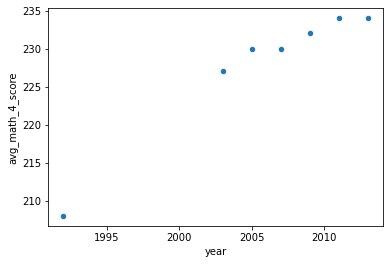

In [13]:
california.plot.scatter(x='year', y='avg_math_4_score')

In [14]:
file2= "diversityindex.csv"
diversity_df = pd.read_csv(file2)
diversity_df.head(50)

,Location,Diversity-Index,"Black or African American alone, percent, 2013","American Indian and Alaska Native alone, percent, 2013","Asian alone, percent, 2013","Native Hawaiian and Other Pacific Islander alone, percent,","Two or More Races, percent, 2013","Hispanic or Latino, percent, 2013","White alone, not Hispanic or Latino, percent, 2013"
0,"Aleutians West Census Area, AK",0.769346,7.4,13.8,31.1,2.3,4.8,14.6,29.2
1,"Queens County, NY",0.742224,20.9,1.3,25.2,0.2,2.7,28.0,26.7
2,"Maui County, HI",0.740757,0.8,0.6,28.8,10.6,23.3,10.7,31.5
3,"Alameda County, CA",0.740399,12.4,1.2,28.2,1.0,5.2,22.7,33.2
4,"Aleutians East Borough, AK",0.738867,7.7,21.8,41.4,0.7,3.7,13.5,12.9
5,"Hawaii County, HI",0.738772,0.8,0.6,22.1,12.7,29.5,12.2,30.7
6,"Fort Bend County, TX",0.736427,21.2,0.6,18.4,0.1,2.0,24.0,35.6
7,HAWAII,0.731461,2.3,0.4,37.7,10.0,23.1,9.8,23.0
8,"Kauai County, HI",0.730326,0.7,0.5,31.3,9.1,24.6,10.5,30.3
9,"Solano County, CA",0.725821,14.9,1.3,15.4,1.0,6.7,25.2,40.0


In [15]:
diversity_index=diversity_df[['Location','Diversity-Index']]
diversity_index1 = diversity_index.rename(columns={"Location": "loca", "Diversity-Index": "divindex"})
diversity_index1.head()

,loca,divindex
0,"Aleutians West Census Area, AK",0.769346
1,"Queens County, NY",0.742224
2,"Maui County, HI",0.740757
3,"Alameda County, CA",0.740399
4,"Aleutians East Borough, AK",0.738867


In [16]:
diversity_state_df = diversity_index1[~diversity_index1["loca"].str.contains(',')]
diversity_state_df.head()

,loca,divindex
7,HAWAII,0.731461
32,CALIFORNIA,0.674524
57,TEXAS,0.641294
62,NEVADA,0.635404
84,DISTRICT OF COLUMBIA,0.614376


In [17]:
diversity_state_df.to_sql(name='diversity', con=engine, if_exists='append', index=False)

In [27]:
query=f"""
    select diversity.loca, diversity.divindex, states_all.total_revenue, states_all.grades_pk_g,states_all.grades_kg_g,states_all.grades_4_g
    from diversity
    left join states_all on diversity.loca=states_all.state
    where states_all.year=2015
    order by states_all.total_revenue desc
    """

In [28]:
diversity_score = pd.read_sql_query(query, con=engine)

In [29]:
diversity_score

,loca,divindex,total_revenue,grades_pk_g,grades_kg_g,grades_4_g
0,TEXAS,1,55582029,243496,376824,397085
1,TEXAS,1,55582029,243496,376824,397085
2,ILLINOIS,1,32096832,87589,135924,149373
3,ILLINOIS,1,32096832,87589,135924,149373
4,PENNSYLVANIA,0,29967185,8201,120874,130671
...,...,...,...,...,...,...
71,VERMONT,0,1996795,7279,5863,5975
72,WYOMING,0,1962874,509,7841,7551
73,WYOMING,0,1962874,509,7841,7551
74,MONTANA,0,1804339,1158,11502,11659


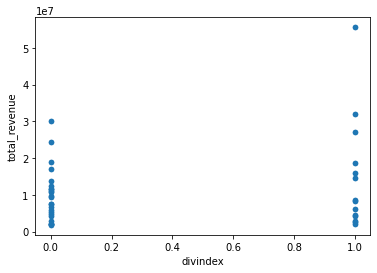

In [30]:

diversity_score.plot.scatter(x='divindex', y='total_revenue')